In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
import numpy as np

## Craigslist Data
This data has been scraped from boston.craigslist.org using the BeautifulSoup, requests and re modules; see Craiglist.ipynb notebook for code and more details.

In [31]:
%store -r all_car_info
print len(all_car_info)
all_car_info.head(3)

7417


,description,location,price,mileage,region,year,std_location
link,,,,,,,
/nwb/cto/5987182859.html,1996 jeep cherokee xj trade for truck,Lowell,2500.0,NaN,nwb/,1996.0,lowel
/sob/cto/6007357742.html,07 volvo s40 T5 AWD,Taunton,7500.0,NaN,sob/,2007.0,taunt
/nos/cto/5988195757.html,2010 Subaru Forester 2.5X,Revere,8750.0,NaN,nos/,2010.0,rever


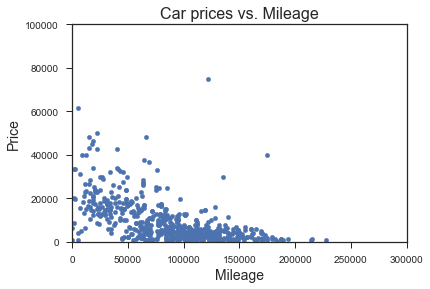

In [9]:
all_car_info.plot.scatter('mileage', 'price')
plt.xlim(0,3E5)
plt.xlabel('Mileage', fontdict={'fontsize': 14})
plt.ylim(0,1E5)
plt.ylabel('Price', fontdict={'fontsize': 14})
plt.title('Car prices vs. Mileage', fontdict={'fontsize': 16})

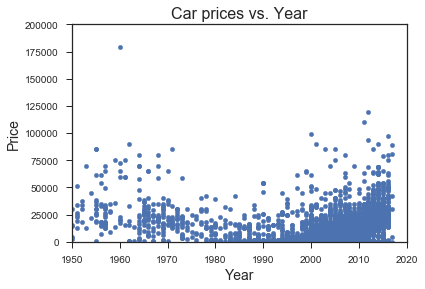

In [10]:
all_car_info.plot.scatter('year', 'price')
plt.ylim(0,2E5)
plt.ylabel('Price', fontdict={'fontsize': 14})
plt.xlim(1950,2020)
plt.xlabel('Year', fontdict={'fontsize': 14})
plt.title('Car prices vs. Year', fontdict={'fontsize': 16})

In [35]:
%store -r regions
print len(regions)
regions.head(3)

21


price              mileage               year      
                     mean count           mean count         mean count
std_location                                                           
abing         5309.057143    70  107571.428571     7  2004.161765    68
malde         5732.739130    69   91500.000000    10  2002.515625    64
rever         6990.328125    64   82800.000000     5  2002.000000    60

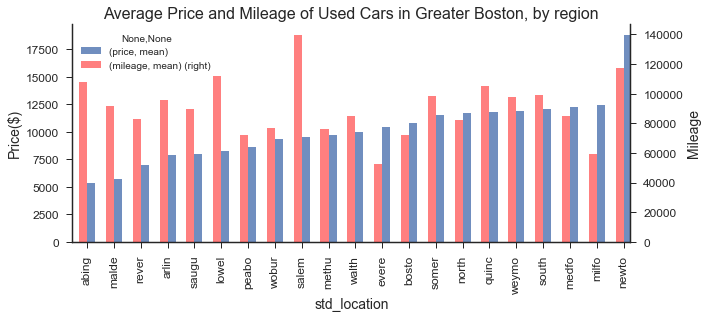

In [19]:
ax = regions['price','mean'].plot.bar(position=0, width=0.3, alpha=0.8, legend=True)
ax.set_title('Average Price and Mileage of Used Cars in Greater Boston, by region', fontdict={'fontsize':16})
ax.set_xlabel('City/Town', fontdict={'fontsize':14})
ax.set_xticklabels(regions.index, fontdict={'fontsize':12})
ax.set_ylabel('Price($)', fontdict={'fontsize':14})
ax.set_yticklabels(range(0,20000,2500), fontdict={'fontsize':12})
ax = regions['mileage','mean'].plot.bar(secondary_y=True, color='red', position=1, width=0.3, alpha=0.5, legend=True)
ax.set_ylabel('Mileage', fontdict={'fontsize':14})
ax.set_yticklabels(range(0,160000,20000), fontdict={'fontsize':12})
sns.despine(top=True, right=False)
fig=ax.get_figure()
fig.set_size_inches(10,4)

## Modeling
A linear regression model was trained on year and mileage using scikit-learn.

In [24]:
%store -r X_test
%store -r y_test
%store -r model
%store -r scores

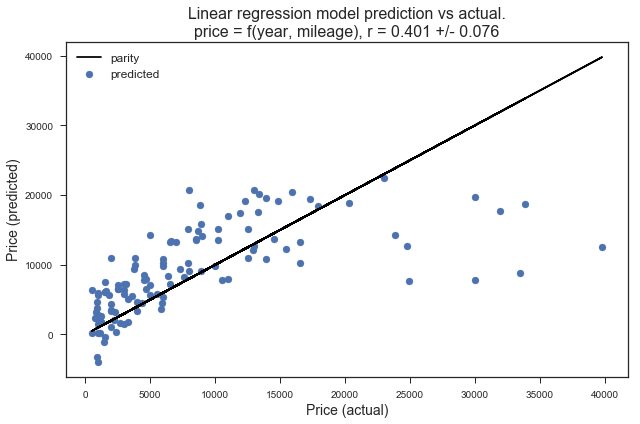

In [25]:
fig = plt.figure(figsize=(9,6))
plt.scatter(y_test, model.predict(X_test), label="predicted")
plt.plot(y_test, y_test, color='black', label="parity")
plt.title("Linear regression model prediction vs actual.\nprice = f(year, mileage), r = {0} +/- {1}".format(
    round(np.mean(scores),3), round(np.std(scores),3)), fontdict={'fontsize': 16})
plt.xlabel("Price (actual)", fontdict={'fontsize': 14})
plt.ylabel("Price (predicted)", fontdict={'fontsize': 14})
plt.legend(loc='best', fontsize='large')
plt.tight_layout()

The model isn't great, due to anomalies for more expensive cars. This is motivation for a better model using less obvious features.

## Putting it together with Edmunds data
See the Craigslist.ipynb and Edmunds.ipynb notebooks for more details. I looked at data just for Ford Focuses, due to Edmunds API limitations! Data was compared to Craigslist averages for Ford Focuses, by year.

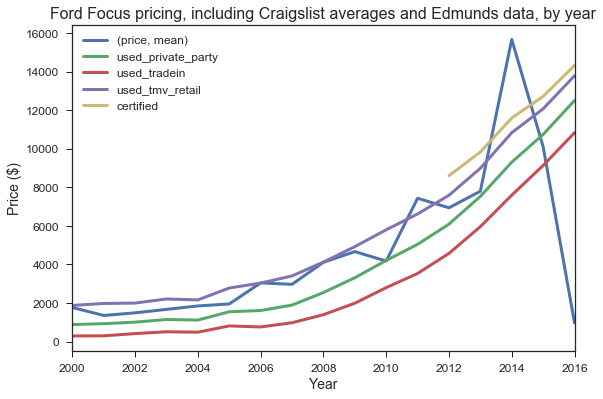

In [37]:
%store -r focus_years
ax = focus_years.plot(y=[('price', 'mean'), 'used_private_party', 'used_tradein', 'used_tmv_retail', 'certified'], lw=3)
ax.set_ylabel("Price ($)", fontdict={'fontsize': 14})
ax.set_yticklabels(range(-2000,18000, 2000), fontdict={'fontsize': 12})
ax.set_xlabel("Year", fontdict={'fontsize': 14})
ax.set_xticklabels(range(2000,2018,2), fontdict={'fontsize': 12})
ax.set_title("Ford Focus pricing, including Craigslist averages and Edmunds data, by year", fontdict={'fontsize': 16})
ax.legend(fontsize = 'large')
fig=ax.get_figure()
fig.set_size_inches(9,6)

In [38]:
%store -r focus_data
print len(focus_data)
focus_data[focus_data['year']==2016]

177


,description,location,price,mileage,region,year,std_location
link,,,,,,,
/gbs/cto/5999533717.html,2016 Ford Focus hatchback lease takeover,Wakefield,290.0,NaN,gbs/,2016.0,wakef
//worcester.craigslist.org/cto/5983547331.html,Ford Focus ZX3 - 5 Speed -= 30+ mpg $$ 1650,,1650.0,NaN,/wor,2016.0,


In [30]:
focus_data[focus_data['year']==2014]

,description,location,price,mileage,region,year,std_location
link,,,,,,,
/nos/cto/5998874532.html,2014 Ford Focus Sedan SE sports package,Billerica,13000.0,NaN,nos/,2014.0,bille
/bmw/cto/6000996919.html,2014 Ford Focus SE Sedan,Arlington,11995.0,NaN,bmw/,2014.0,arlin
/nwb/cto/5951866403.html,2014 Ford Focus SE Silver - 1 Owner - Like New,Tewksbury,14000.0,NaN,nwb/,2014.0,tewks
/bmw/cto/5986928247.html,2014 Ford Focus ST,Lunenburg,20000.0,NaN,bmw/,2014.0,lunen
/gbs/cto/5975159514.html,2014 Ford Focus se,,NaN,NaN,gbs/,2014.0,
/bmw/cto/5981878527.html,2014 Ford Focus ST ST3,,18000.0,NaN,bmw/,2014.0,
//southcoast.craigslist.org/cto/5969313945.html,2014 Ford Focus ST,,16999.0,NaN,/sou,2014.0,
